In [19]:
import pandas as pd
import numpy as np
from time import strftime
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_csv(path):
    """Reads the csv file and outputs the first 30 entries"""
    df = pd.read_csv(path)
    return df

In [3]:
df=read_csv("E:\Kyosk Assessment\Retention-Rate\data\data.csv")
df

,id,sale_date,amount
0,POVD,25-04-21,1540
1,WEPI,25-04-21,1040
2,YJQN,25-04-21,1190
3,SCJS,25-04-21,4730
4,ZABT,25-04-21,16850
...,...,...,...
91480,GGVY,16-03-21,3230
91481,LZOK,16-03-21,10595
91482,AIVS,16-03-21,3350
91483,BE7R,16-03-21,6700


In [4]:
def col_types(dataframe):
    """Check the data types of each column"""
    return dataframe.dtypes

In [5]:
col_types(df)

id           object
sale_date    object
amount        int64
dtype: object

In [6]:
# convert sales_date into date data type
df.sale_date = pd.to_datetime(df['sale_date'])

In [7]:
# the percentage of missing values in the dataset
def missing_values(dataframe:pd.DataFrame):
    # Total number of elements in the dataset
    totalCells = dataframe.size
    #Number of missing values per column
    missingCount = dataframe.isnull().sum()
    #Total number of missing values
    totalMissing = missingCount.sum()
    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

missing_values(df)

The dataset contains 0.0 % missing values.


In [8]:
# group data into weekly data
weeklyCustData=pd.DataFrame(df.resample("W", on="sale_date").id.count())
weeklyCustData=weeklyCustData.reset_index()
weeklyCustData

,sale_date,id
0,2021-01-03,1568
1,2021-01-10,802
2,2021-01-17,3120
3,2021-01-24,4946
4,2021-01-31,4376
5,2021-02-07,2957
6,2021-02-14,720
7,2021-02-21,5198
8,2021-02-28,5182
9,2021-03-07,2782


In [9]:
st_date=df.groupby('id')['sale_date'].min()
st_date=st_date.rename("start_day")
st_date.head()

id
0.00E+00   2021-02-03
004E       2021-04-23
006B       2021-06-04
00BO       2021-01-14
01-Feb     2021-02-13
Name: start_day, dtype: datetime64[ns]

In [10]:
new_df=pd.merge(df,st_date, left_on='id',right_index=True)
new_df

,id,sale_date,amount,start_day
0,POVD,2021-04-25,1540,2021-01-04
1882,POVD,2021-03-19,2000,2021-01-04
2028,POVD,2021-03-26,2640,2021-01-04
2430,POVD,2021-01-04,2000,2021-01-04
3375,POVD,2021-09-03,3610,2021-01-04
...,...,...,...,...
91329,DZRW,2021-01-21,2250,2021-01-21
91334,TWCP,2021-01-21,2075,2021-01-21
91406,9FRR,2021-03-16,1055,2021-03-16
91419,DUM7,2021-03-16,1130,2021-03-16


In [11]:
new_df['days_since_sale'] = (new_df['sale_date'] - new_df['start_day']).dt.days
new_df.head()

,id,sale_date,amount,start_day,days_since_sale
0,POVD,2021-04-25,1540,2021-01-04,111
1882,POVD,2021-03-19,2000,2021-01-04,74
2028,POVD,2021-03-26,2640,2021-01-04,81
2430,POVD,2021-01-04,2000,2021-01-04,0
3375,POVD,2021-09-03,3610,2021-01-04,242


In [12]:
# Extract start week
new_df['start_week'] = new_df.apply(lambda x: (x['start_day'] - pd.Timedelta(x['start_day'].dayofweek, u='day')).date(), axis=1)

# For some reason I don't care to dig into, the output was not a datetime so I'm converting it into one.
new_df['start_week'] = pd.to_datetime(new_df['start_week'])

# Get the number of weeks since the user started
new_df['weeks_since_start'] = np.floor((new_df['sale_date'] - new_df['start_week']) / np.timedelta64(1, 'W'))

In [13]:
new_df.head()

,id,sale_date,amount,start_day,days_since_sale,start_week,weeks_since_start
0,POVD,2021-04-25,1540,2021-01-04,111,2021-01-04,15.0
1882,POVD,2021-03-19,2000,2021-01-04,74,2021-01-04,10.0
2028,POVD,2021-03-26,2640,2021-01-04,81,2021-01-04,11.0
2430,POVD,2021-01-04,2000,2021-01-04,0,2021-01-04,0.0
3375,POVD,2021-09-03,3610,2021-01-04,242,2021-01-04,34.0


In [14]:
new_df

,id,sale_date,amount,start_day,days_since_sale,start_week,weeks_since_start
0,POVD,2021-04-25,1540,2021-01-04,111,2021-01-04,15.0
1882,POVD,2021-03-19,2000,2021-01-04,74,2021-01-04,10.0
2028,POVD,2021-03-26,2640,2021-01-04,81,2021-01-04,11.0
2430,POVD,2021-01-04,2000,2021-01-04,0,2021-01-04,0.0
3375,POVD,2021-09-03,3610,2021-01-04,242,2021-01-04,34.0
...,...,...,...,...,...,...,...
91329,DZRW,2021-01-21,2250,2021-01-21,0,2021-01-20,0.0
91334,TWCP,2021-01-21,2075,2021-01-21,0,2021-01-20,0.0
91406,9FRR,2021-03-16,1055,2021-03-16,0,2021-03-15,0.0
91419,DUM7,2021-03-16,1130,2021-03-16,0,2021-03-15,0.0


In [30]:
group=new_df.groupby(['start_week','weeks_since_start'])

cohort_data = group['id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

cohort_counts = cohort_data.pivot(index='start_week',
                                 columns ='weeks_since_start',
                                 values = 'id')

# Printing top 5 rows of Dataframe
cohort_data.head()

,start_week,weeks_since_start,id
0,2020-12-31,0.0,1
1,2020-12-31,3.0,1
2,2020-12-31,4.0,1
3,2020-12-31,5.0,1
4,2020-12-31,7.0,1


In [31]:
print(cohort_counts.round(1))

weeks_since_start    0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0   \
start_week                                                                   
2020-12-31            1.0    NaN    NaN    1.0    1.0    1.0    NaN    1.0   
2021-01-01         1062.0  392.0  731.0  771.0  661.0    NaN  663.0  691.0   
2021-01-02          353.0   94.0  155.0  153.0  164.0    NaN  230.0  250.0   
2021-01-04          567.0  122.0  151.0  143.0  208.0   56.0  232.0  259.0   
2021-01-12          537.0  297.0  221.0  173.0  117.0  246.0  188.0  157.0   
...                   ...    ...    ...    ...    ...    ...    ...    ...   
2021-11-02           28.0    NaN    NaN    NaN    2.0    NaN    NaN    NaN   
2021-11-30           39.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2021-12-01           26.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2021-12-02           16.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2021-12-03           35.0    NaN    NaN    NaN    NaN    NaN    

In [32]:
cohort_sizes = cohort_counts.iloc[:,0]

retention = cohort_counts.divide(cohort_sizes, axis=0)

### Customer retention table

In [33]:
# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

weeks_since_start,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0
start_week,,,,,,,,,,,,,,,,,,,,,
2020-12-31,100.0,NaN,NaN,100.0,100.0,100.0,NaN,100.0,100.0,100.0,...,100.0,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN
2021-01-01,100.0,36.9,68.8,72.6,62.2,NaN,62.4,65.1,60.7,NaN,...,47.8,NaN,NaN,NaN,53.9,NaN,NaN,NaN,45.4,37.2
2021-01-02,100.0,26.6,43.9,43.3,46.5,NaN,65.2,70.8,56.1,NaN,...,45.3,NaN,NaN,NaN,42.8,NaN,NaN,NaN,43.3,26.9
2021-01-04,100.0,21.5,26.6,25.2,36.7,9.9,40.9,45.7,38.3,14.5,...,21.5,NaN,NaN,NaN,31.0,NaN,NaN,NaN,46.0,NaN
2021-01-12,100.0,55.3,41.2,32.2,21.8,45.8,35.0,29.2,19.7,33.1,...,NaN,NaN,15.5,24.8,NaN,NaN,NaN,40.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-02,100.0,NaN,NaN,NaN,7.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
retention.index = retention.index.strftime('%Y-%m')
retention.index

Index(['2020-12', '2021-01', '2021-01', '2021-01', '2021-01', '2021-01',
       '2021-01', '2021-01', '2021-01', '2021-01', '2021-01', '2021-01',
       '2021-01', '2021-01', '2021-01', '2021-01', '2021-01', '2021-01',
       '2021-01', '2021-02', '2021-02', '2021-02', '2021-02', '2021-02',
       '2021-02', '2021-02', '2021-02', '2021-02', '2021-02', '2021-02',
       '2021-02', '2021-02', '2021-02', '2021-03', '2021-03', '2021-03',
       '2021-03', '2021-03', '2021-03', '2021-03', '2021-03', '2021-03',
       '2021-03', '2021-03', '2021-03', '2021-03', '2021-03', '2021-03',
       '2021-03', '2021-04', '2021-04', '2021-04', '2021-04', '2021-04',
       '2021-04', '2021-04', '2021-04', '2021-04', '2021-04', '2021-04',
       '2021-04', '2021-04', '2021-04', '2021-04', '2021-04', '2021-04',
       '2021-04', '2021-05', '2021-05', '2021-05', '2021-06', '2021-06',
       '2021-06', '2021-06', '2021-07', '2021-07', '2021-08', '2021-08',
       '2021-08', '2021-09', '2021-09', '2021-09', 

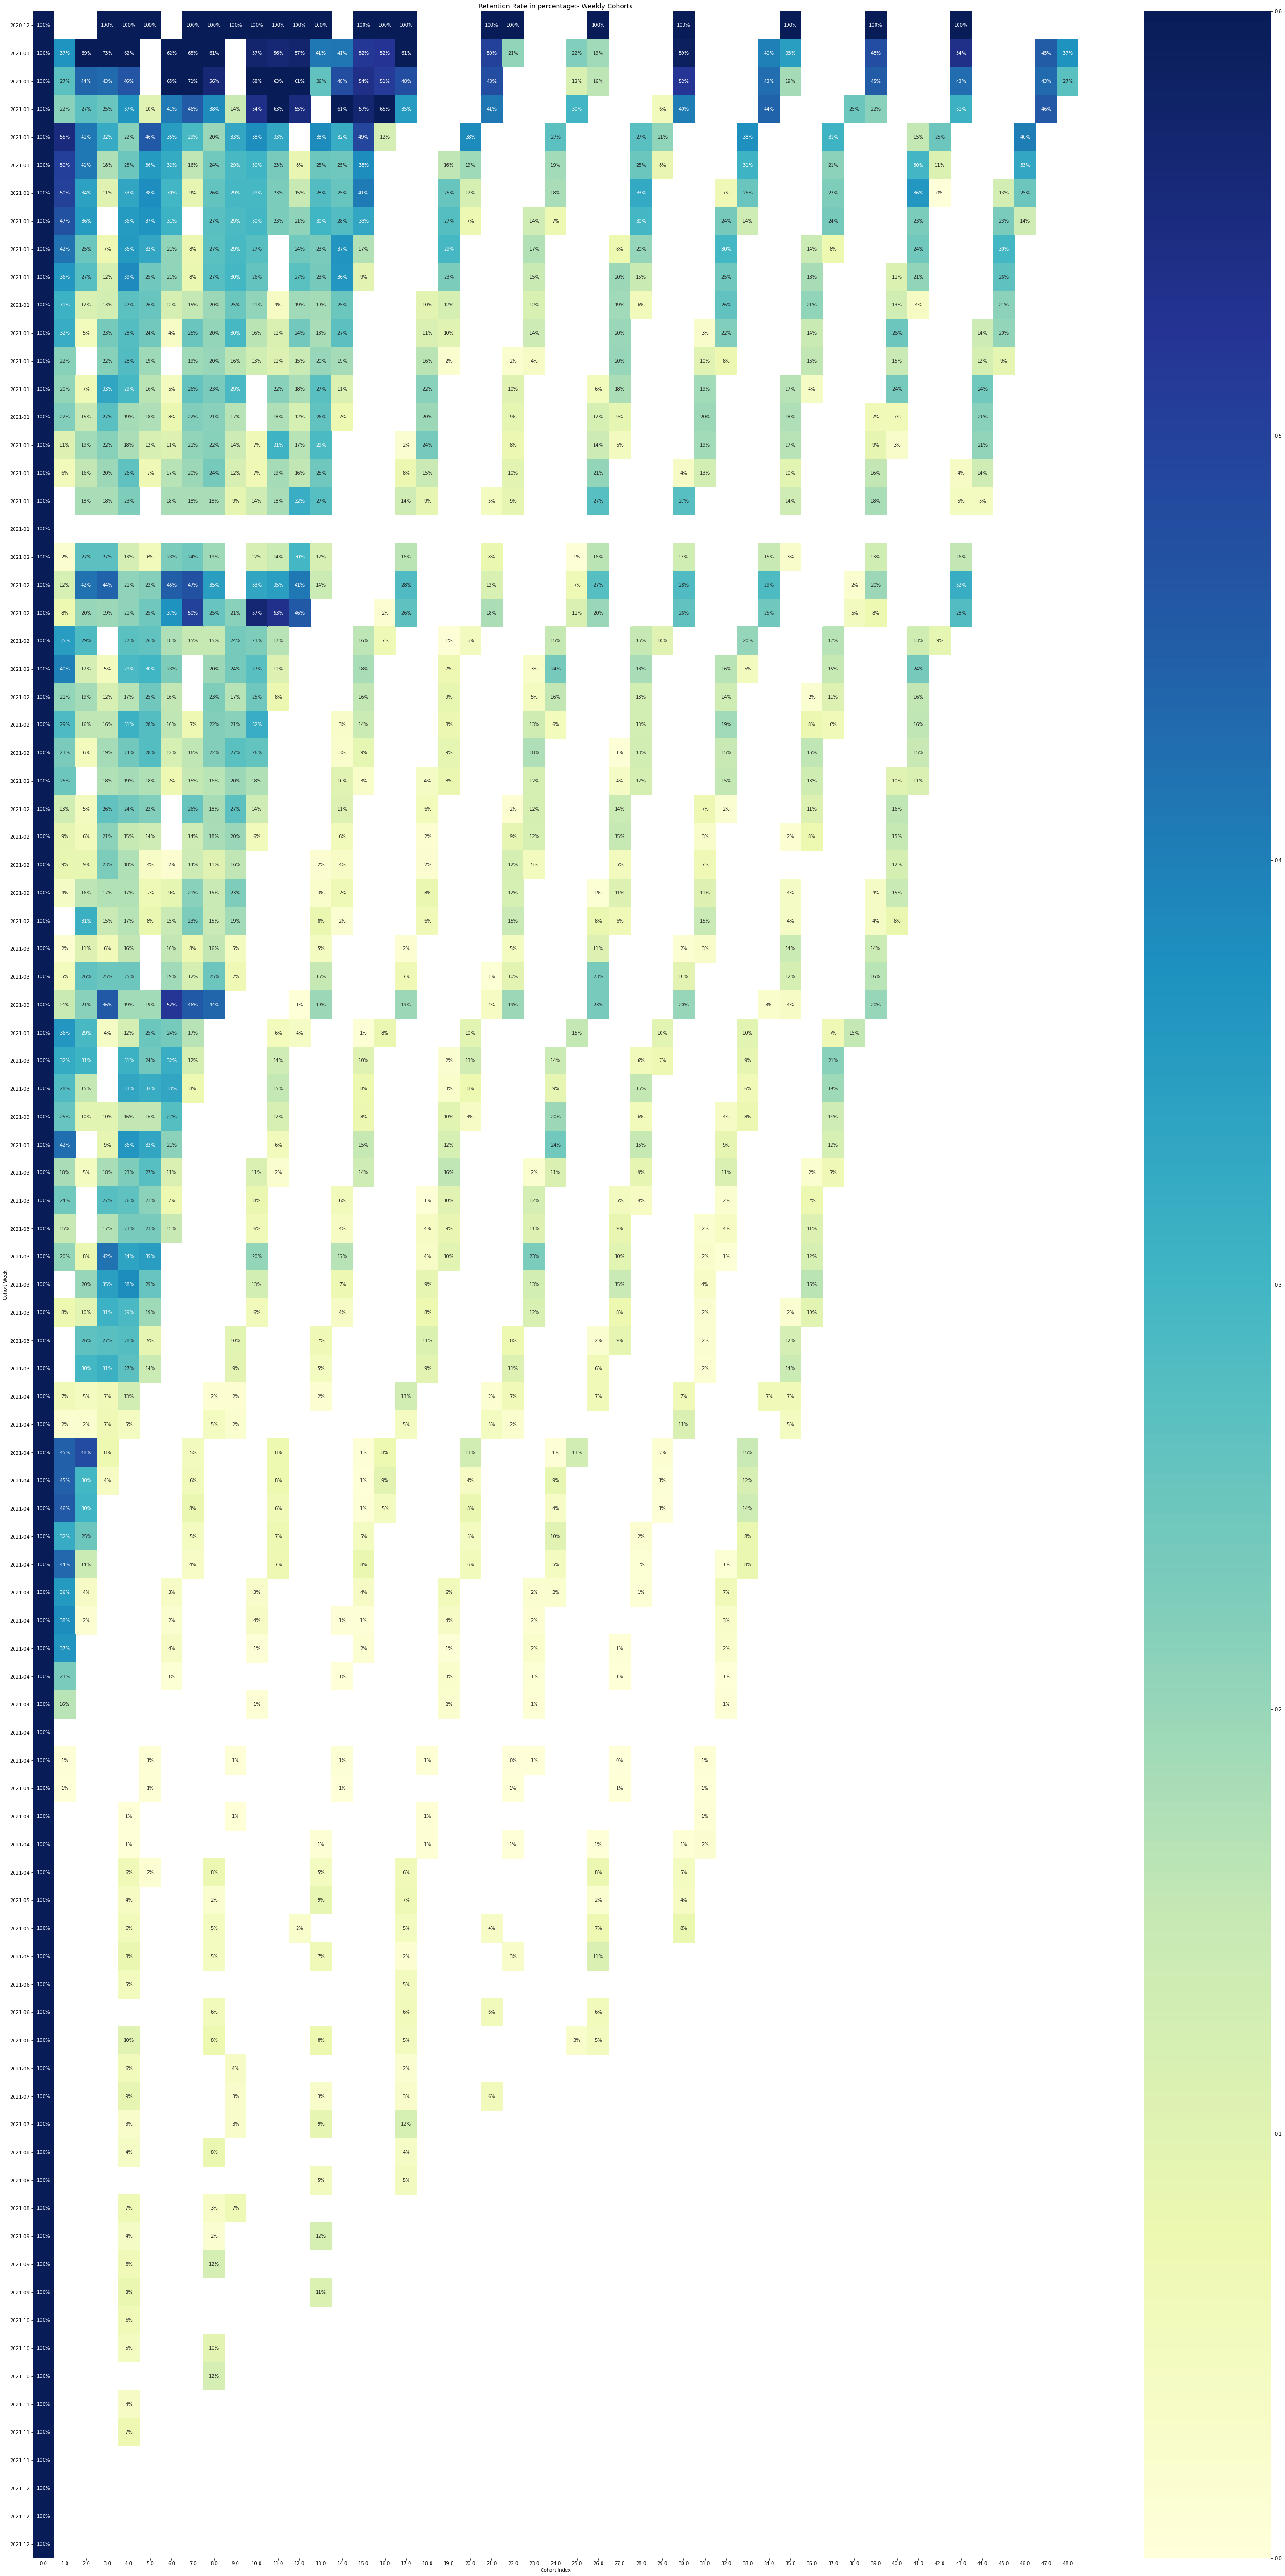

In [39]:
# Initialize the figure
plt.figure(figsize=(50, 100))

# Adding a title
plt.title('Retention Rate in percentage:- Weekly Cohorts', fontsize = 14)

# Creating the seaborn based heatmap
sns.heatmap(retention, annot=True, fmt= '.0%',cmap='YlGnBu', vmin = 0.0 , vmax = 0.6)
plt.ylabel('Cohort Week')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

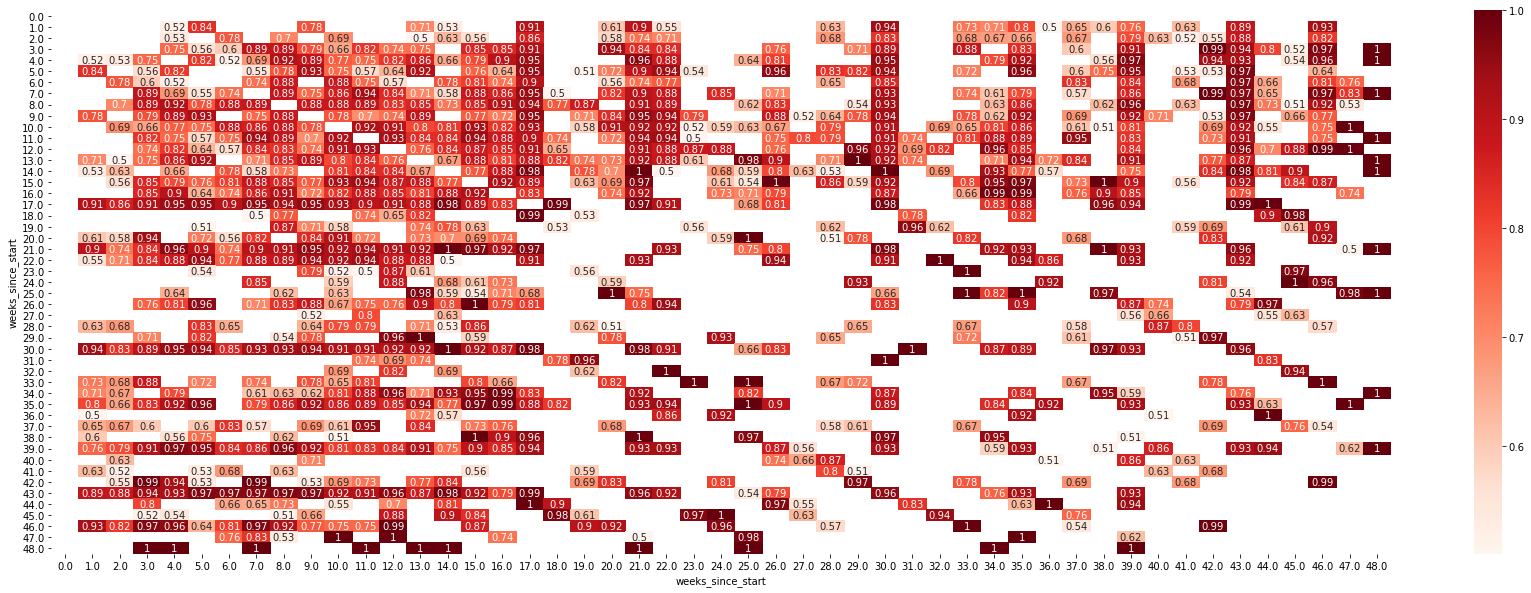

In [38]:
# create correlation matrix with abs values
corr_matrix = retention.corr().abs()

# change this value as needed, if 0.5 does not work for your scenario
threshold = 0.5

filtered_corr_df = corr_matrix[(corr_matrix >= threshold) & (corr_matrix != 1.000)] 

plt.figure(figsize=(30,10))
sns.heatmap(filtered_corr_df, annot=True, cmap="Reds")
plt.show()

### Revenue Retention Table

In [ ]:
revGroup=new_df.groupby(['start_week','weeks_since_start'])

revCohort = revGroup['amount'].apply(pd.Series.nunique)
revCohort = revCohort.reset_index()

revCohortCounts = revCohort.pivot(index='start_week',
                                 columns ='weeks_since_start',
                                 values = 'amount')

# Printing top 5 rows of Dataframe
revCohort.head()

In [1]:
revCohortSize = revCohortCounts.iloc[:,0]

revRetention = revCohortCounts.divide(revCohortSize, axis=0)

NameError: name 'cohort_counts' is not defined

In [2]:
# Coverting the retention rate into percentage and Rounding off.
revRetention.round(3)*100

NameError: name 'revRetention' is not defined

### Cohort Retention

In [ ]:
timeGroup=new_df.groupby(['start_week','weeks_since_start'])

timeCohort = timeGroup['amount'].apply(pd.Series.nunique)
timeCohort = timeCohort.reset_index()

timeCohortCounts = timeCohort.pivot(index='start_week',
                                 columns ='weeks_since_start',
                                 values = 'weeks_since_start')

# Printing top 5 rows of Dataframe
timeCohort.head()